# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. EDA](#3)
- [4. Assign Features and Target Variables](#4)
- [5. Feature Scaling](#5)
- [6. Spliting the data into Training and Testing Data](#6)
- [7. Modeling](#7)
    - [7.1 Random Forest Regressor Model](#7.1)
    - [7.2 Gradient Boosting Regressor Model](#7.2)
    - [7.3 Bagging Regressor model](#7.3)
    - [7.4 Linear Regression Model](#7.4)
    - [7.5 SVR model](#7.5)
    - [7.6 Decision Tree Regressor](#7.6)
    - [7.7 XGBoost Regressor](#7.7)

<a id='2'></a>
# Import Necssaries Libraries

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from tpot import TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

<a id='3'></a>
# EDA

In [37]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [38]:
df.shape

(2290, 6)

In [39]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [41]:
df.Date = df.Date.apply(pd.to_datetime)

In [42]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [43]:
df['Year'] = pd.DatetimeIndex(df['Date']).year # year column for extract some insights
df.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD,Year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,2008


In [44]:
df.groupby('Year').mean()

,SPX,GLD,USO,SLV,EUR/USD
Year,,,,,
2008,1208.337274,86.111148,77.528756,14.760708,1.464481
2009,945.604864,95.834464,34.145446,14.478527,1.393900
2010,1142.600627,119.966397,36.651847,19.922883,1.330050
2011,1268.544188,152.591486,37.781486,34.118063,1.389480
2012,1378.354519,162.151507,35.541598,30.349772,1.287449
2013,1642.193891,136.853213,35.014751,23.179909,1.329559
2014,1930.589375,121.721294,33.887277,18.276295,1.327894
2015,2061.795563,111.165561,16.527623,14.999596,1.109867
2016,2091.121803,118.780634,10.474525,16.161176,1.105778


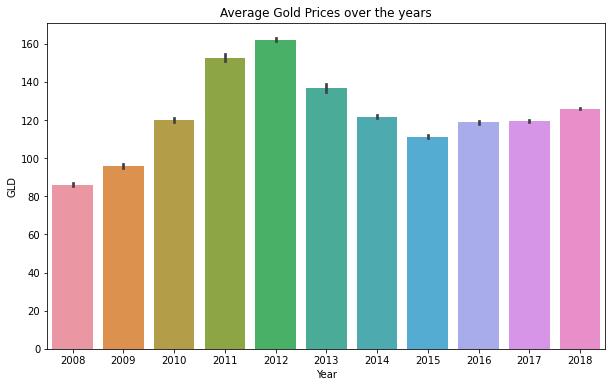

In [45]:
plt.figure(figsize=(10,6))
plt.title('Average Gold Prices over the years')
sns.barplot(x='Year', y='GLD', data=df);

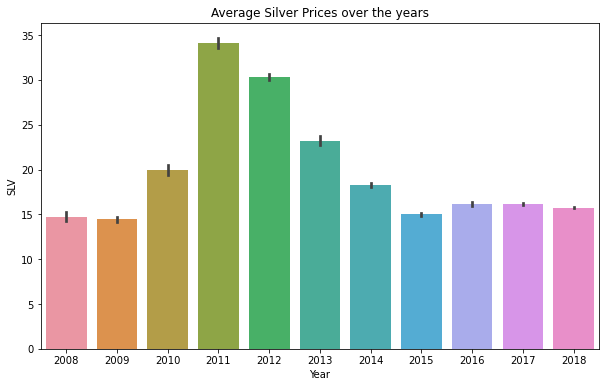

In [46]:
plt.figure(figsize=(10,6))
plt.title('Average Silver Prices over the years')
sns.barplot(x='Year', y='SLV', data=df);

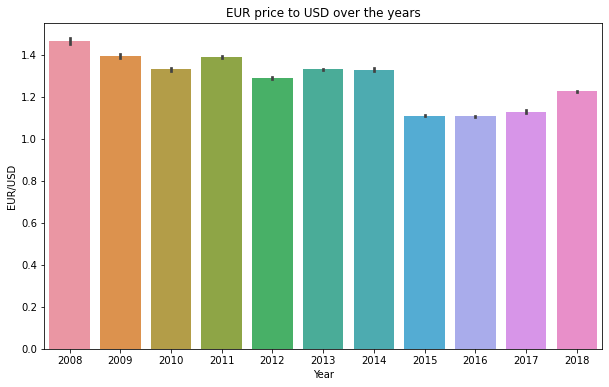

In [47]:
plt.figure(figsize=(10,6))
plt.title('EUR price to USD over the years')
sns.barplot(x='Year', y='EUR/USD', data=df);

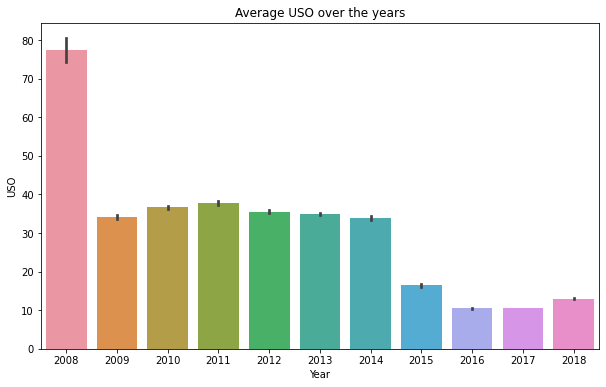

In [48]:
plt.figure(figsize=(10,6))
plt.title('Average USO over the years')
sns.barplot(x='Year', y='USO', data=df);

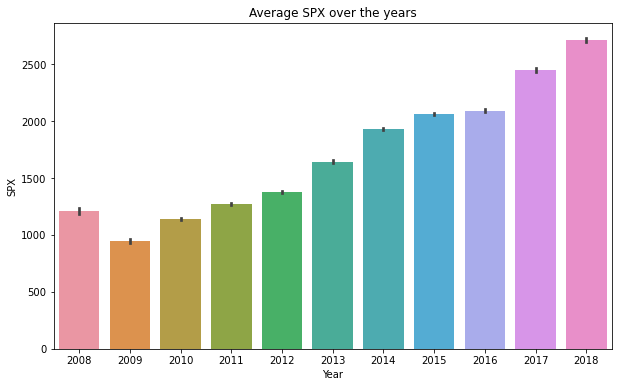

In [49]:
plt.figure(figsize=(10,6))
plt.title('Average SPX over the years')
sns.barplot(x='Year', y='SPX', data=df);

In [50]:
df2 = df.copy()
df2.drop('Year', axis=1, inplace=True) # don't need the year column 
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


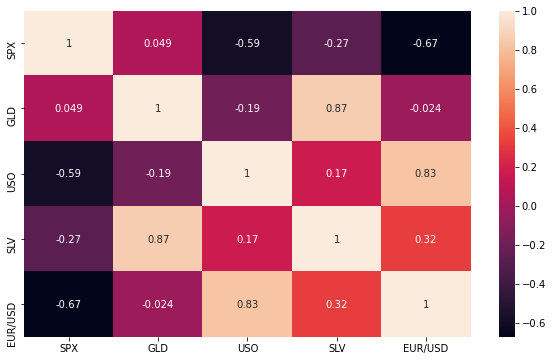

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True);

- GLD is highly Postivily correlated with SLV (87%)


Skewness: 0.3341383472692508
Kurtosis: -0.2750805233458311


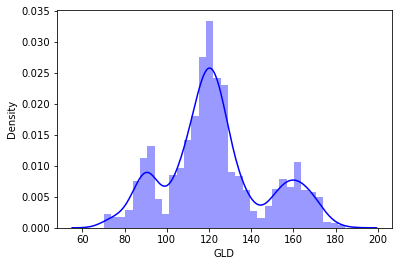

In [52]:
sns.distplot(df['GLD'], color = 'blue')
print(f"Skewness: {df['GLD'].skew()}")
print(f"Kurtosis: {df['GLD'].kurt()}");

Data is normally distributed Data has low kurtosis tend to lack of outliers and data is a very little skewed to right

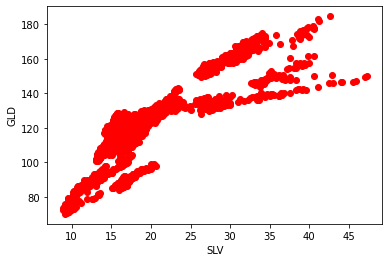

In [53]:
plt.scatter(df.SLV, df.GLD, c='red') #highly correlated
plt.xlabel('SLV')
plt.ylabel('GLD')
plt.show()

<a id='4'></a>
# Assign Feature and Target variable

In [55]:
X = df2.drop(['GLD', 'Date'], axis=1)
y = df2.GLD
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


<a id='5'></a>
# Feature Scaling

In [61]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale[0]

array([-0.39914541,  2.38880956, -0.6917197 ,  1.42975293])

<a id='6'></a>
# Splitting the data into Training and Testing data

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scale,y, test_size=0.25, random_state=0)

In [68]:
print(f"Number of Training dataset: {len(X_train)}\nNumber of Testing dataset: {len(X_test)}")

Number of Training dataset: 1717
Number of Testing dataset: 573


<a id='7'></a>
# Modeling

In [72]:
def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")

<a id='7.1'></a>
## Random Forest Regressor

In [73]:
rf_model = RandomForestRegressor()
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest model score on Training data: 99.83871918939656%
Random Forest model score on Testing data: 99.13186628837335%
R2 Score for Random Forest is 99.13186628837335%


<a id='7.2'></a>
## Gradient Boosting

In [75]:
gbr = GradientBoostingRegressor()
train(gbr, "Gradient Boosting")
r2(gbr, "Gradient Boosting")

Gradient Boosting model score on Training data: 98.74244336209985%
Gradient Boosting model score on Testing data: 98.41307413525743%
R2 Score for Gradient Boosting is 98.41307413525743%


<a id='7.3'></a>
## Bagging 

In [76]:
br = BaggingRegressor()
train(br, "Bagging")
r2(br, "Bagging")

Bagging model score on Training data: 99.74961320372863%
Bagging model score on Testing data: 99.08847988441947%
R2 Score for Bagging is 99.08847988441947%


<a id='7.4'></a>
## Linear Regression

In [77]:
lr = LinearRegression()
train(lr, "Linear Regression")
r2(lr, "Linear Regression")

Linear Regression model score on Training data: 88.51829349434134%
Linear Regression model score on Testing data: 86.90802464545342%
R2 Score for Linear Regression is 86.90802464545342%


<a id='7.5'></a>
## SVR 

In [100]:
svr = SVR(kernel='rbf', gamma='auto', C=50000)
train(svr, "SVR")
r2(svr, "SVR")

SVR model score on Training data: 98.53260106917018%
SVR model score on Testing data: 98.4462700839728%
R2 Score for SVR is 98.4462700839728%


<a id='7.6'></a>
## Decision Tree

In [101]:
dtr = DecisionTreeRegressor()
train(dtr, "Decision Tree")
r2(dtr, "Decision Tree")

Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 98.51877072727895%
R2 Score for Decision Tree is 98.51877072727895%


<a id='7.7'></a>
## Xgboost

In [103]:
xgboost = XGBRegressor()
train(xgboost, "XGBoost")
r2(xgboost, "XGBoost")

XGBoost model score on Training data: 99.95281548793471%
XGBoost model score on Testing data: 99.01786838510532%
R2 Score for XGBoost is 99.01786838510532%
